# CA1: Spam Database

“Spam” emails are a major issue in everyday life and spam filters have now become a necessity in all aspects of life. The data set attached is real life example of emails that have been sent to a company and have been labelled as True (is spam) and False (not spam). This is a high dimensional dataset that needs to be prepared for classification, in order to create a ML mode for spam filtering. 

Minimum Requirements  
  
You are required to use the dataset contained within the file “spambase.csv”, conduct the following analysis and report on your findings:  
  
•	Characterisation of the data set: size; number of attributes; has/does not have missing values, number of observations etc. and what these Characterisation mean in the context of this data.

•	Application of Data preparation/evaluation methods (Cleaning, renaming, etc) and EDA visualizations (plural), including a clear and concise explanation of your rationale for what you are doing with the data and why you are doing it in the context of this data.  

•	Use PCA to establish the minimum number of features needed for retaining 99.5% variance in the data and then implement PCA to dimensionally reduce the data to the number of features that you have discovered. Include a clear and concise explanation of your rationale for what you are doing with the data and why you are doing it in the context of this data.  

•	Explain in your own words what the “Curse of Dimensionality ” is and how it may affect your analysis going forward in the context of this problem. 

•	Testing your dimensionally reduced dataset practically and discuss your results in the context of this data. 


## Characterisation: Raw Data

In [1]:
import pandas as pd

# Load the dataset
file_path = 'spambase.csv'
df = pd.read_csv(file_path)

df.head()


,Unnamed: 0,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,is_spam
0,0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,True
1,1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,True
2,2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,True
3,3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,True
4,4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,True


In [2]:
# Size, attributes, missing values, class distribution
dataset_info = {
    'shape': df.shape,
    # all of them together
    'missing_values': df.isnull().sum().sum(),
    # Beginning till end
    'spam_class_distribution': df.iloc[:, -1].value_counts(normalize=True)
}

# Print info
dataset_info

{'shape': (4601, 59),
 'missing_values': 341,
 'spam_class_distribution': is_spam
 False    0.605955
 True     0.394045
 Name: proportion, dtype: float64}

## Data preparation

In [3]:
# Convert True/False to 1/0 in the 'is_spam' column
df['is_spam'] = df['is_spam'].astype(int)

# Fill missing values with the mean of numeric columns
df_cleaned = df.fillna(df.mean(numeric_only=True))

# Verify
df_cleaned.head()


,Unnamed: 0,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,is_spam
0,0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [4]:
df_cleaned.isnull().sum().sum()

250

Null values, now let's get rid of them with the mode

In [5]:
# Filling any remaining NaN values in the dataset with the most common value (mode)
df_cleaned = df_cleaned.fillna(df_cleaned.mode().iloc[0])


In [6]:
df_cleaned.isnull().sum().sum()

0

We used the mode because if I dropped NA values this spam class distributuion would have drastically changed

In [7]:
# Check spam class distribution after converting True/False to 1/0
spam_class_distribution_numeric = df_cleaned['is_spam'].value_counts(normalize=True)

# Display the class distribution with numeric values
spam_class_distribution_numeric


is_spam
0    0.605955
1    0.394045
Name: proportion, dtype: float64

We can see that there is no changes after dealing missing values

In [8]:
df_cleaned = df_cleaned.apply(pd.to_numeric, errors='coerce')

Force convertion of all columns to numeric for statistical purposes

In [9]:
# Save the cleaned dataset to use later
cleaned_file_path = 'spambase_cleaned.csv'

df_cleaned.to_csv(cleaned_file_path, index=False)

Now that the data is cleaned, renamed and prepared. Saving cleaned data and loading again

In [10]:
df_cleaneddf = pd.read_csv(cleaned_file_path)

df.head()

,Unnamed: 0,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,is_spam
0,0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


## Characterisation: **Cleaned** data set

In [11]:
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt

#Characterization of the dataset
dataset_characterization = {
    'size': df_cleaned.shape[0], 
    'num_attributes': df_cleaned.shape[1], 
    'missing_values': df_cleaned.isnull().sum().sum(), 
    'num_spam': (df_cleaned['is_spam'] == 1).sum(), 
    'num_non_spam': (df_cleaned['is_spam'] == 0).sum(),
}

dataset_characterization

{'size': 4601,
 'num_attributes': 59,
 'missing_values': 4,
 'num_spam': 1813,
 'num_non_spam': 2788}

Characterisation meaning:

'size': Number of total observations.

'num_attributes': Number of attributes, or columns.

'missing_values': Total missing values after cleaning.

'num_spam': How many Spam emails.

'num_non_spam': How many Non-spam emails.


## Exploratory Data Analysis (EDA) Visualizations

Text(0.5, 1.0, 'Distribution of Spam and Non-Spam Emails')

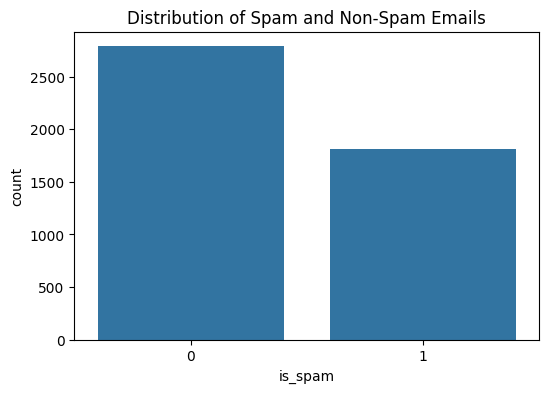

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Spam and non-spam distribution plot
plt.figure(figsize=(6,4))
sns.countplot(x=df_cleaned['is_spam'])
plt.title('Distribution of Spam and Non-Spam Emails')


First and foremost we will see the words distribution **Histogram** among the messages so we can pick the ones that could help us dig deep more in this dataset. After that we will see an Average Word Frequencies for Spam and Non-Spam Emails **Bar plot** and try to confirm findings with a **Heatmap**. Later on we will take some of our findings and analyse them individually with **Other plots**

### Histogram

array([[<Axes: title={'center': 'Unnamed: 0'}>,
        <Axes: title={'center': 'word_freq_make'}>,
        <Axes: title={'center': 'word_freq_address'}>,
        <Axes: title={'center': 'word_freq_all'}>,
        <Axes: title={'center': 'word_freq_3d'}>,
        <Axes: title={'center': 'word_freq_our'}>,
        <Axes: title={'center': 'word_freq_over'}>,
        <Axes: title={'center': 'word_freq_remove'}>],
       [<Axes: title={'center': 'word_freq_internet'}>,
        <Axes: title={'center': 'word_freq_order'}>,
        <Axes: title={'center': 'word_freq_mail'}>,
        <Axes: title={'center': 'word_freq_receive'}>,
        <Axes: title={'center': 'word_freq_will'}>,
        <Axes: title={'center': 'word_freq_people'}>,
        <Axes: title={'center': 'word_freq_report'}>,
        <Axes: title={'center': 'word_freq_addresses'}>],
       [<Axes: title={'center': 'word_freq_free'}>,
        <Axes: title={'center': 'word_freq_business'}>,
        <Axes: title={'center': 'word_freq_e

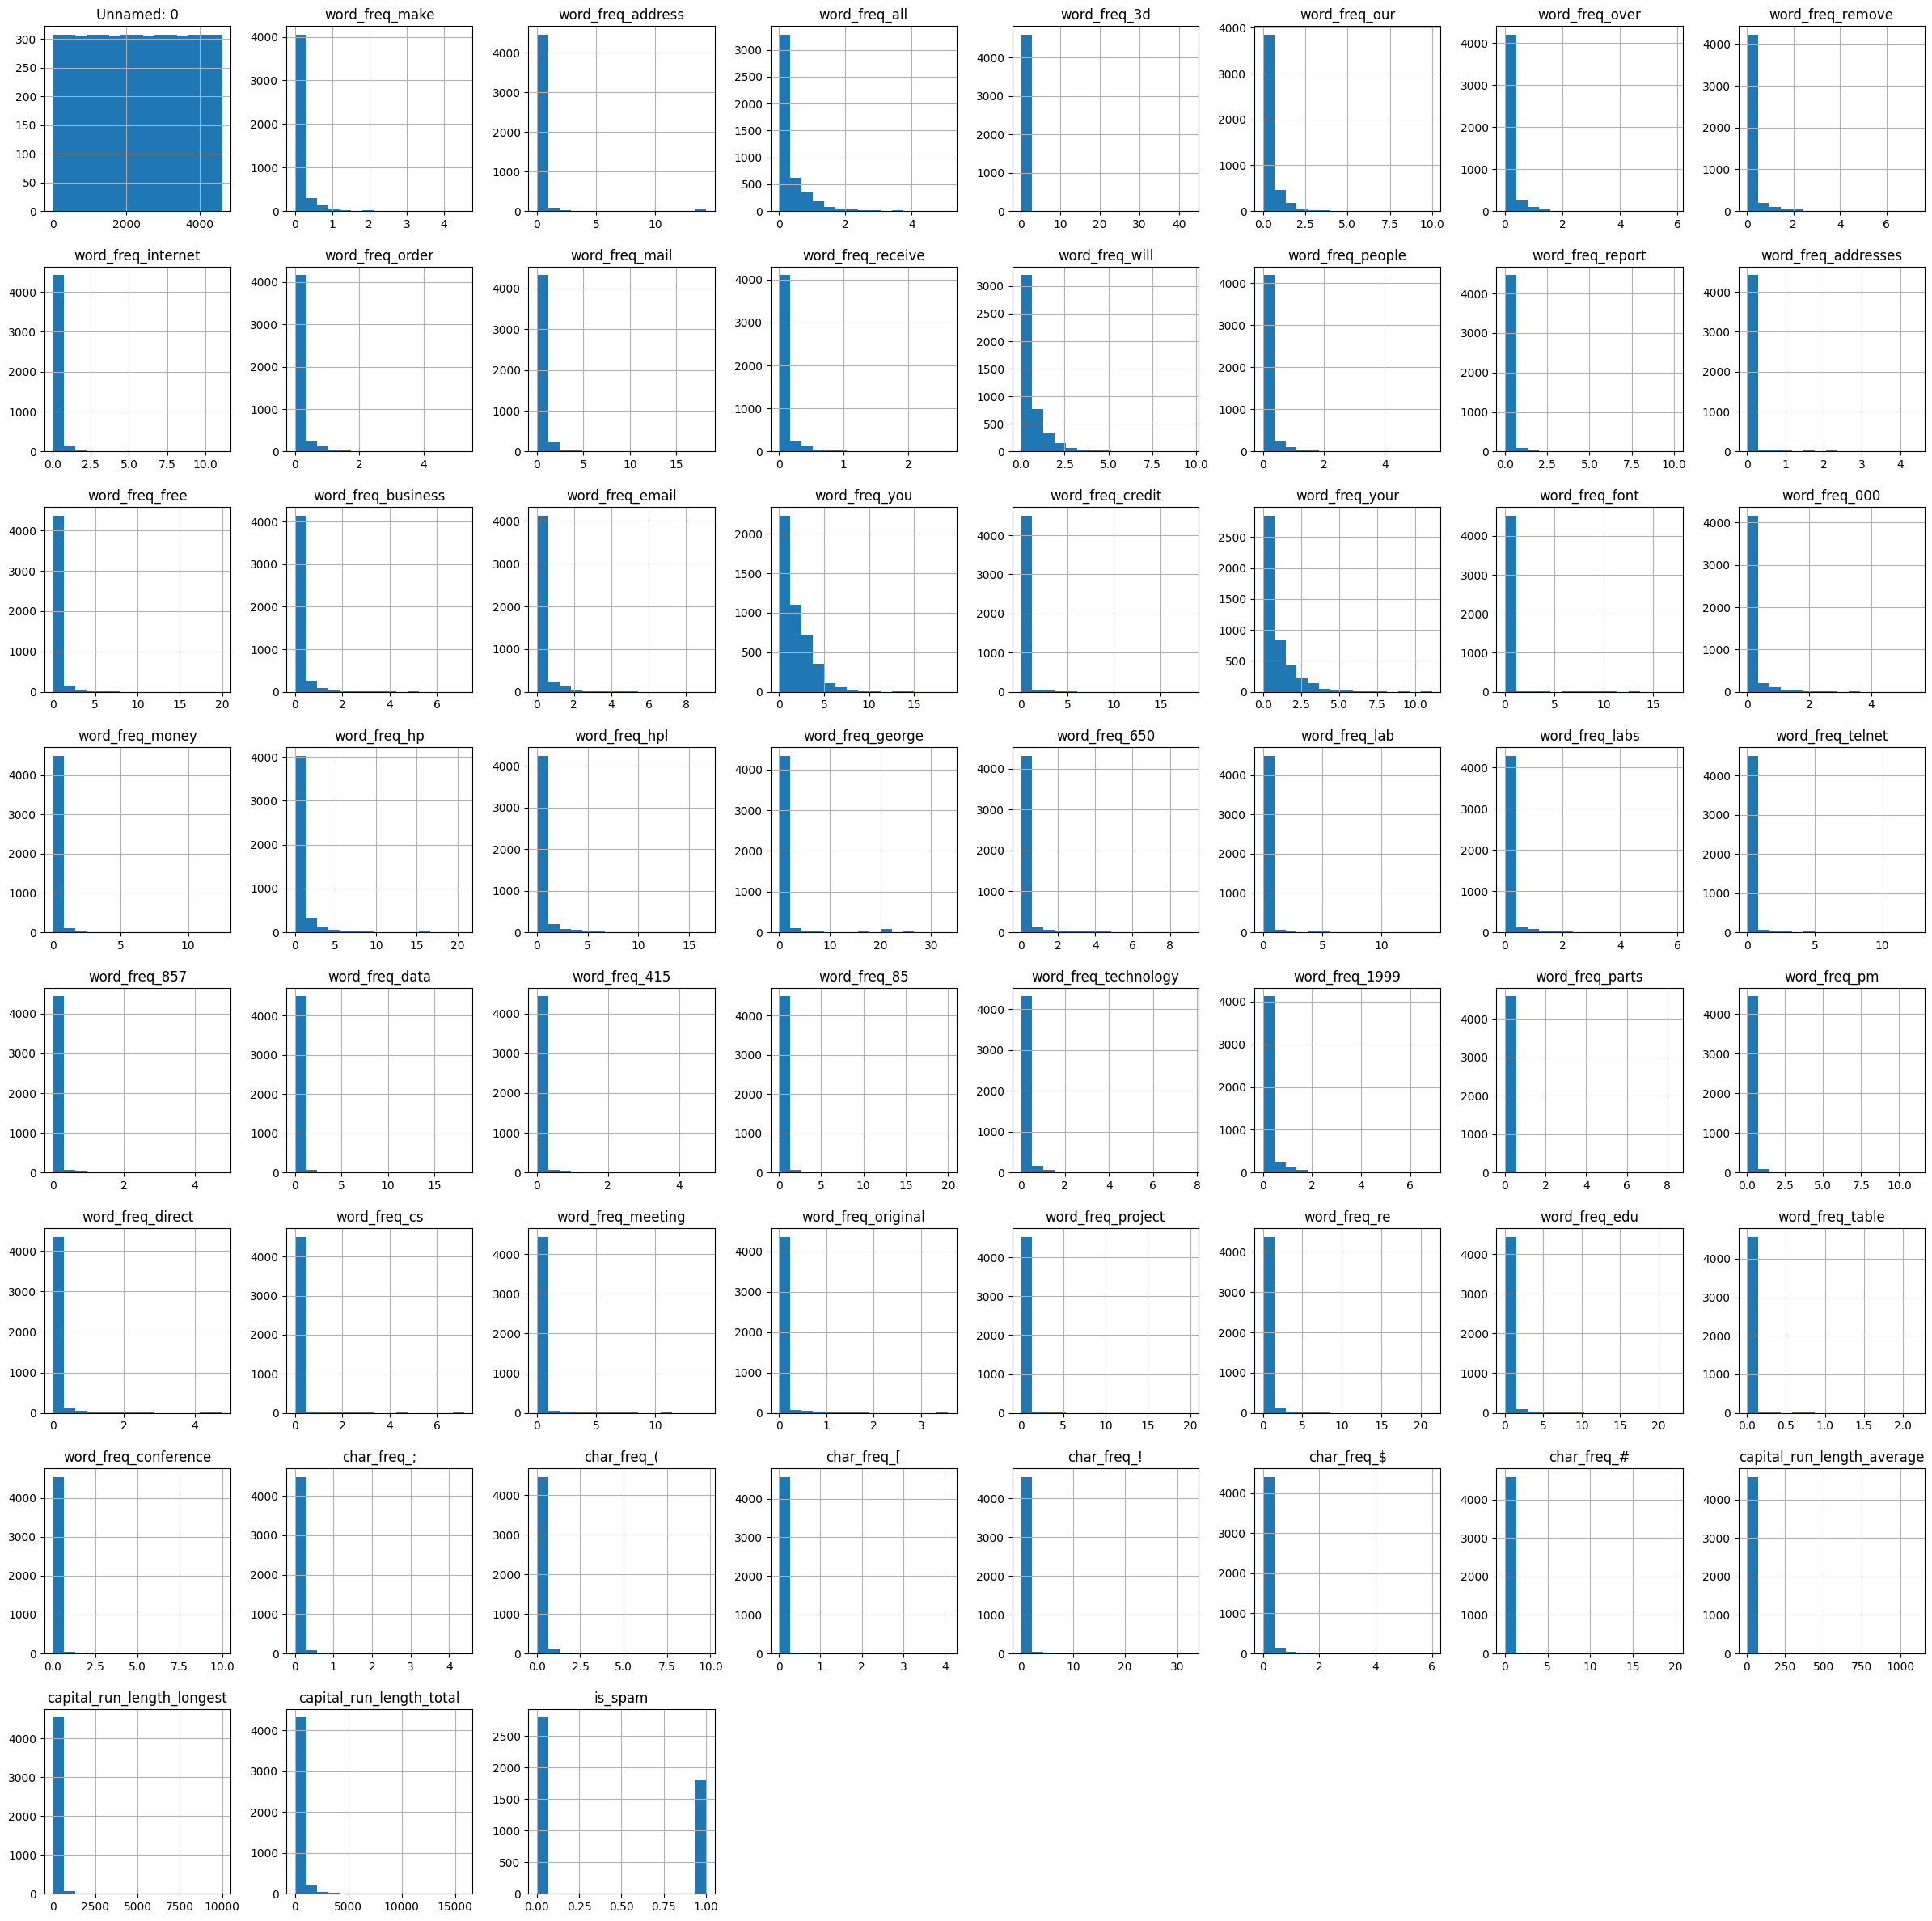

In [13]:
df_cleaned.hist(bins=15, figsize=(30, 30))


Based on this charts, we could study:
- word_freq_all
- word_freq_will
- word_freq_you
- word_freq_your
- word_freq_free
- word_freq_email
- word_freq_85
- char_freq_!
- char_freq_#
- capital_run_lenght_average
- capital_run_lenght_longest
- capital_run_lenght_total

Due to the fact they are the most **distributed words** along the messages, with that being said the following plots are created upon this study.

We chose this chart because it will help me to have a broader view of all the dataset in a simple graphic

### Bar Plot

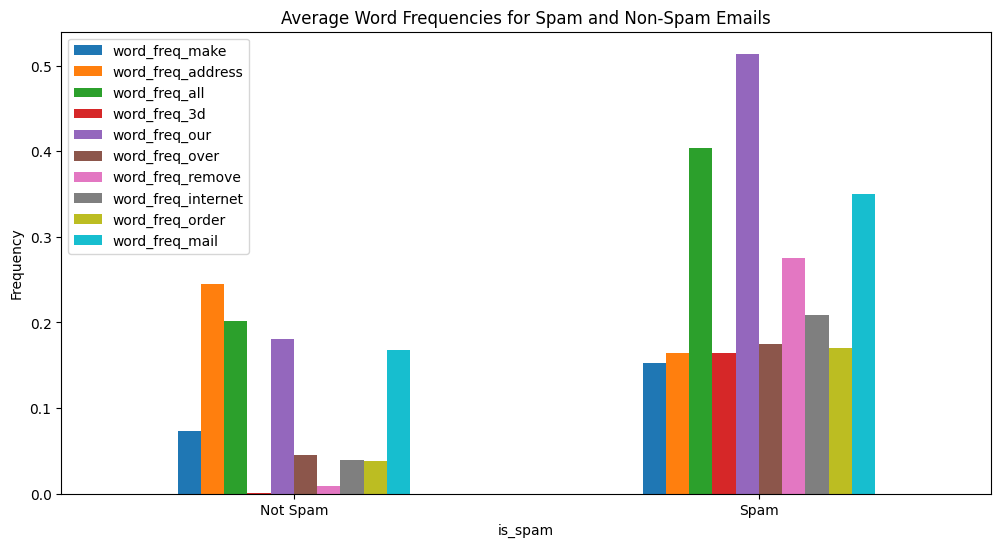

In [14]:
# Group by 'is_spam' and calculate the mean
spam_grouped = df_cleaned.groupby('is_spam').mean()

# First 10 words frep and plotting
top_word_freqs = [col for col in df_cleaned.columns if 'word_freq' in col][:10]
spam_grouped[top_word_freqs].plot(kind='bar', figsize=(12, 6))
plt.title('Average Word Frequencies for Spam and Non-Spam Emails')
plt.ylabel('Frequency')
plt.xticks([0, 1], ['Not Spam', 'Spam'], rotation=0)
plt.show()



Based on this charts we  can see:

- **Non-Spam** feautures: word_freq_adress.

- **Spam** features: word_freq_our, word_freq_all, word_freq_mail.

We should count with these feautures in further studies

We chose this chart because bar columns are great for visualization and in this case can help me identifying patterns

### Heatmap

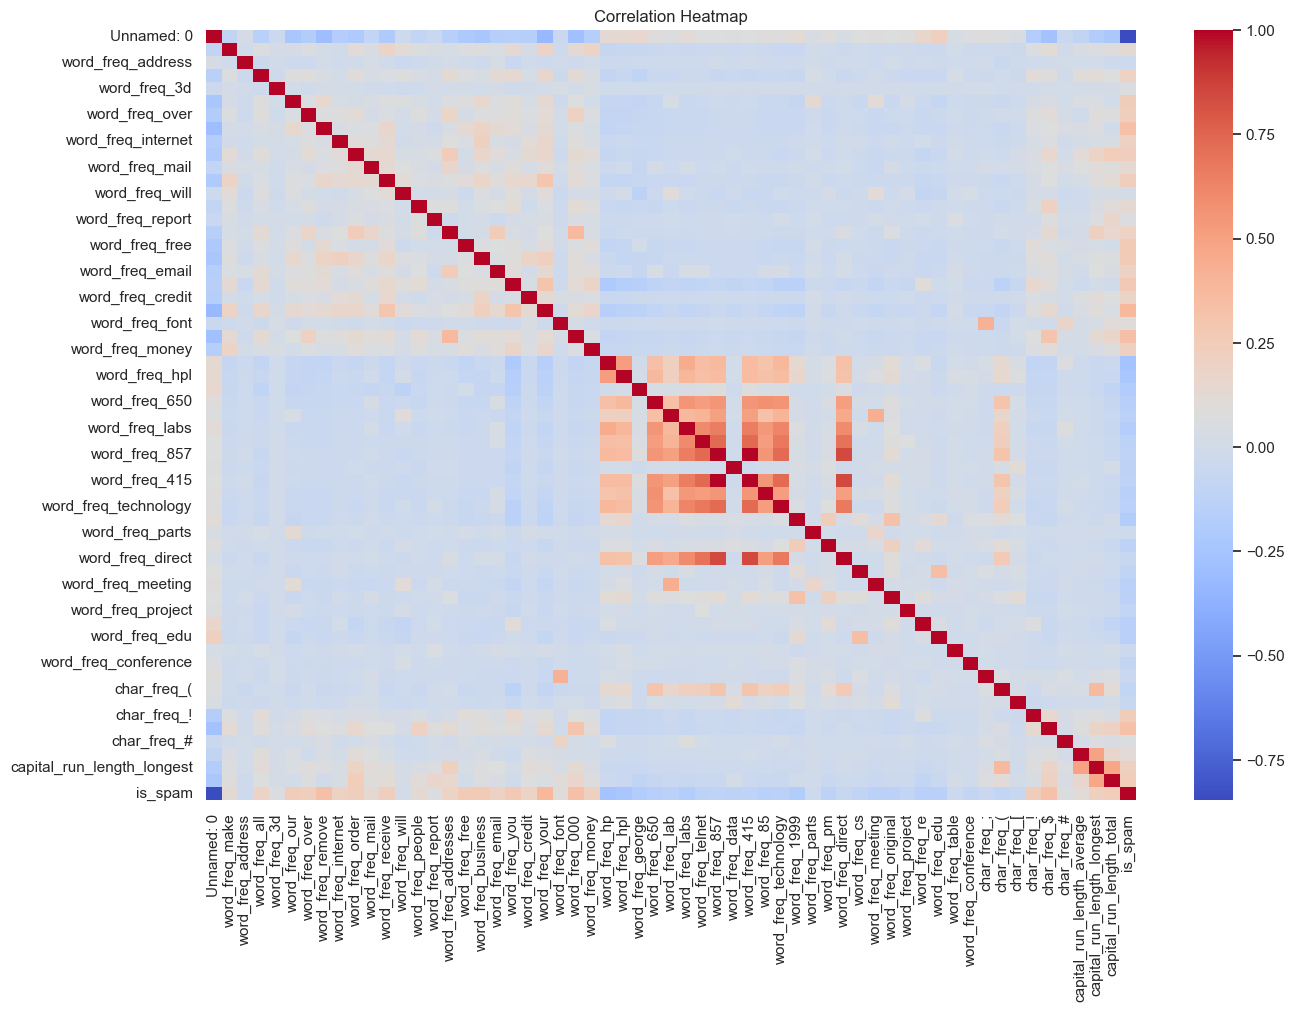

In [15]:
sns.set(style="whitegrid")

plt.figure(figsize=(15, 10))
correlation_matrix = df_cleaned.corr()
sns.heatmap(correlation_matrix, cmap="coolwarm", annot=False)
plt.title('Correlation Heatmap')
plt.show()

We can see that **word_fre_857** and **word_freq_415**  have a higher correlation of those emails being Spam, whereas **word_freq_hpl** would be the opposite. In this case this Heatmap did not helped us too much in confirming our previous findings.

This Heatmap as the distribution Histogram help me to find patterns in either Spam or Non-Spam.

### Box Plot

C:\Users\gabri\AppData\Local\Temp\ipykernel_16740\3601896020.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_cleaned, x='is_spam', y='char_freq_!', palette='Set2')


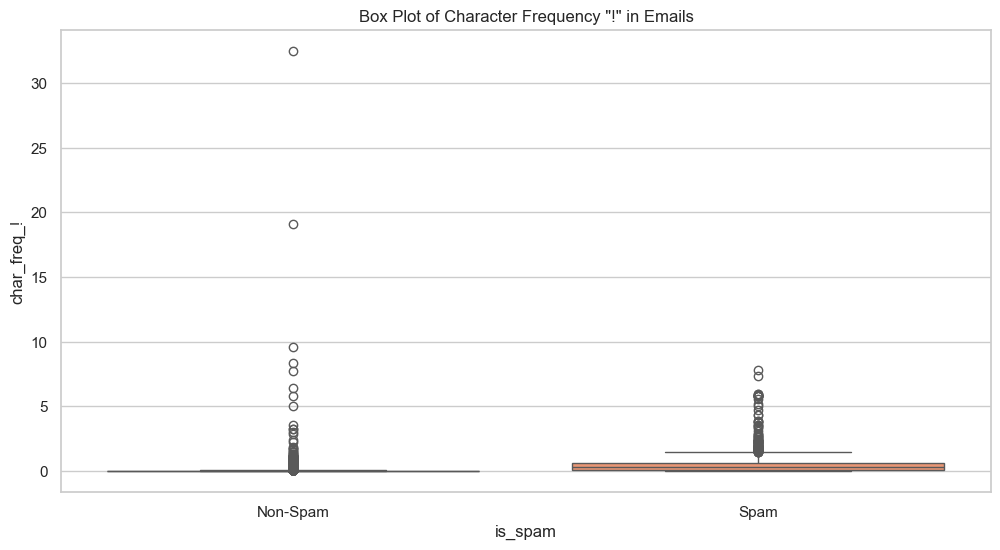

In [16]:
char_freq_cols = ['char_freq_!']
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_cleaned, x='is_spam', y='char_freq_!', palette='Set2')
plt.title('Box Plot of Character Frequency "!" in Emails')
plt.xticks([0, 1], ['Non-Spam', 'Spam'])
plt.show()

This a nice although a complicated one,

At firt sight we can say that messages with more "!" should not be Spam, but if we carefully see the body of the Spam box plot we will see that that is not the case, it is more common to use "!" in spam messages, but it is true that we have some outliers in Non-Spam ranging from 19 to 30 cases the "!" character was used as well, but they do not seem to be the norm based on the Non-Spam box plot.

In this cases, We might affirm that in a range from 0 to 5 the use of the "!" character the email probably would be Spam, after 10 times the "!" character is used the probability of the email being Spam decreases.

I chose this boxplot because it allows me to see the body (Regular data) and percentiles (Outliers) in oder to have a deeper knowledge about the particular feature.

### Violin Plot

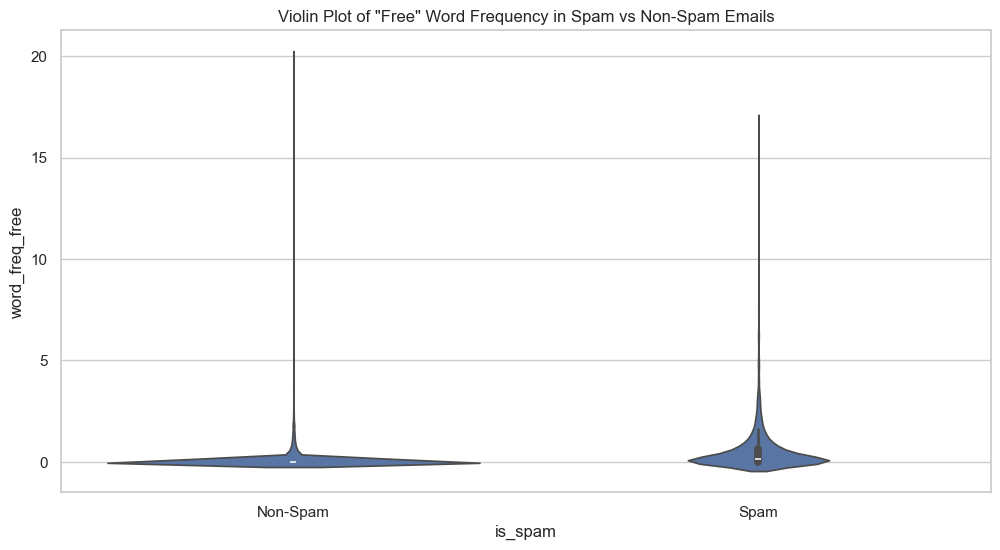

In [17]:
plt.figure(figsize=(12, 6))
sns.violinplot(x='is_spam', y='word_freq_free', data=df_cleaned)
plt.title('Violin Plot of "Free" Word Frequency in Spam vs Non-Spam Emails')
plt.xticks([0, 1], ['Non-Spam', 'Spam'])
plt.show()

Very similar to the previous one, Non-Spam seems to be more distributed but in Spam emails the word **free** seems to be more common with less outliers

Violin plot similar to boxplot allows me to see the most common characteristic about the studied feature thanks to its density attributes.

### Capital Letters Study

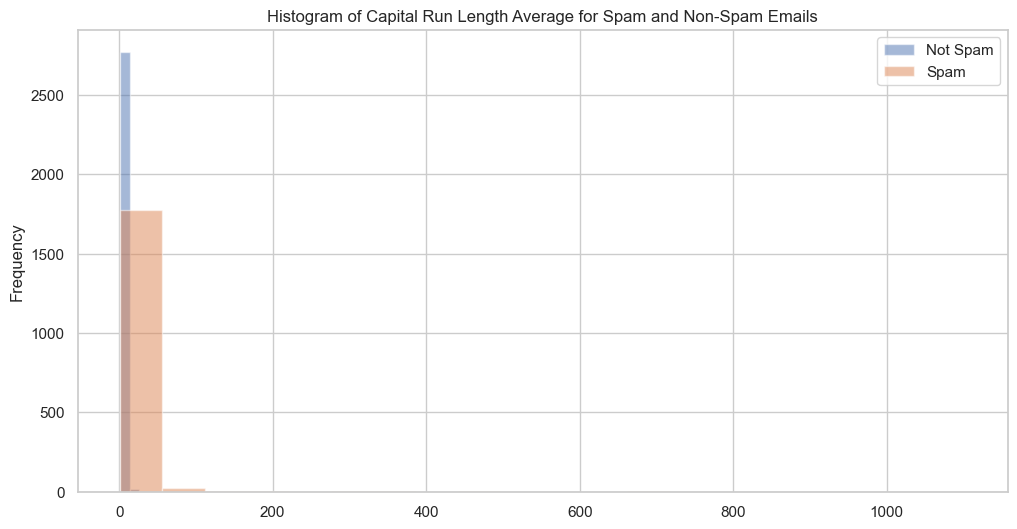

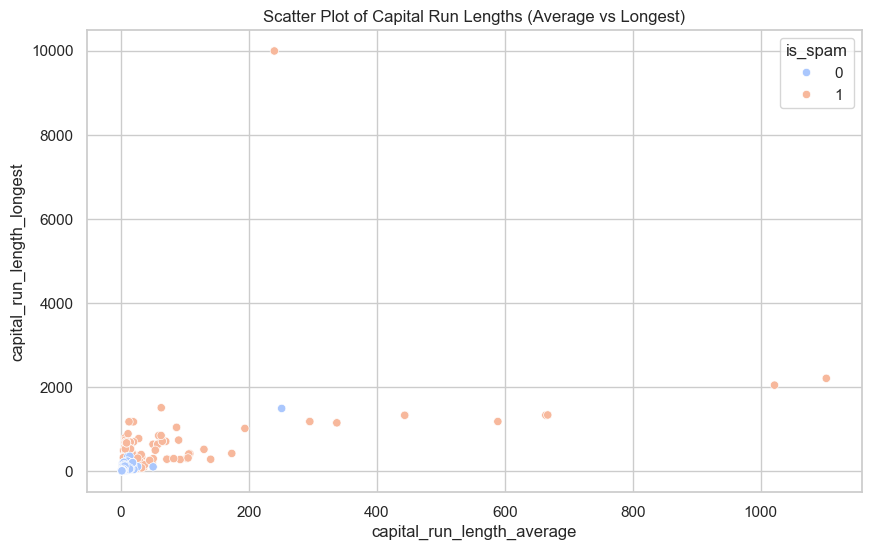

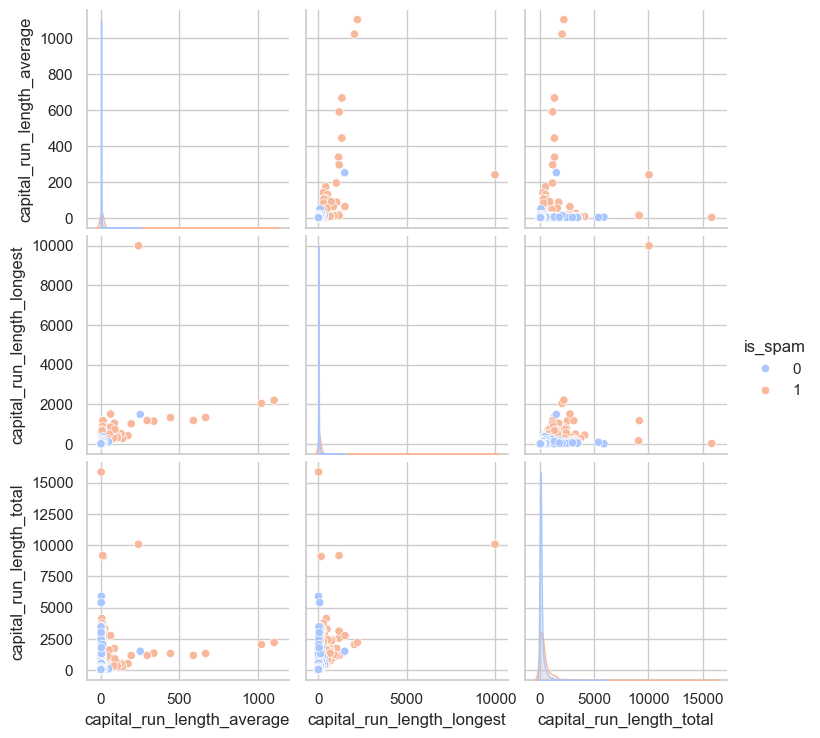

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns


# Histogram of capital run lengths
plt.figure(figsize=(12, 6))
df_cleaned[df_cleaned['is_spam'] == 0]['capital_run_length_average'].plot(kind='hist', alpha=0.5, label='Not Spam', bins=20)
df_cleaned[df_cleaned['is_spam'] == 1]['capital_run_length_average'].plot(kind='hist', alpha=0.5, label='Spam', bins=20)
plt.title('Histogram of Capital Run Length Average for Spam and Non-Spam Emails')
plt.legend()
plt.show()

# Scatter Plot of capital_run_length_average vs capital_run_length_longest colored by spam
plt.figure(figsize=(10, 6))
sns.scatterplot(x='capital_run_length_average', y='capital_run_length_longest', hue='is_spam', data=df_cleaned, palette='coolwarm')
plt.title('Scatter Plot of Capital Run Lengths (Average vs Longest)')
plt.show()

# Pair Plot for capital run length features
capital_cols = ['capital_run_length_average', 'capital_run_length_longest', 'capital_run_length_total']
sns.pairplot(df_cleaned[capital_cols + ['is_spam']], hue='is_spam', palette='coolwarm', diag_kind='kde')
plt.show()



- **Histogram**: Capital letters **seems** to be more common in Spam emails, only when Capital letters are used in Non- Spam emails they tend to have a large number of them.

- **Scatter Plot**: Contradicts completely what happened with the Histogram, Average and Longest seems to be more in Spam emails.

- **Pair Plot**: Validates what the scatter plot showed us, but, there is a big but, I see some anomalies in the data that we need to be aware of, (e.g.: I see some high spikes in Not-Spam emails) that is why the Histogram was in favour of Non-Spam emails.

Conclusion: **There are more capital letters in Spam emails**, but we need a further study to analyse Non-Spam emails anomalies as well.

I used a combination of these charts in order to gain a deep understanding of the feature in itself; by applying contrast (Pair Plot), distribution (Histogram) and clustering (Scatter Plot)

## PCA
To dimensionally reduce the data while retaining 99.5% variance 

In [19]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.impute import SimpleImputer

features = df_cleaned.drop(columns=['is_spam'])


We first isolate our target which is "is_spam"

In [20]:
imputer = SimpleImputer(strategy='mean')

features_imputed = imputer.fit_transform(features)

We handle missing values by imputing the mean

In [21]:
scaler = StandardScaler()

#  Standardize the imputed data
features_scaled = scaler.fit_transform(features_imputed)

Then we Standarize the data to ensure all features contribute equally to the analysis.

In [22]:
# Apply PCA
pca = PCA().fit(features_scaled)


We apply the PCA to the already standarized data.

In [23]:
# Cumulative variance ratio
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# Minimum number of components to reach 99.5% variance. The count starts from 0.
num_components = np.argmax(cumulative_variance >= 0.995) + 1

print(f"Minimum number of components to retain 99.5% variance: {num_components}")


Minimum number of components to retain 99.5% variance: 56


explained_variance_ratio_ gives us the percentage of total variance by each component

np.cumsum() adds up this variance to help us determine the number of components needed.

np.argmax help us to get the minimum number of components to reach 99.5% variance and The count starts from 0.

**We have our number: 56 Components are needed to keep 99.5% of variance**

In [24]:
n_components = num_components
pca = PCA(n_components)

Storing and applying PCA to the min number of components

In [25]:
features_reduced = pca.fit_transform(features_scaled)

Reducing dimensions

In [26]:
df_reduced = pd.DataFrame(features_reduced, columns=[f'PC{i+1}' for i in range(num_components)])

# Adding the previous isolated target
df_reduced['is_spam'] = df_cleaned['is_spam'].values

New DataFrame with the reduced features, now each column is called PCX (Principal Component X)

In [27]:
df_reduced.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC48,PC49,PC50,PC51,PC52,PC53,PC54,PC55,PC56,is_spam
0,-0.888373,0.502389,-0.675056,0.306674,-0.170901,-0.365705,-0.201108,-0.297803,0.805823,-0.594514,...,-0.500808,-0.105140,0.782148,0.570321,-0.189865,0.267360,-0.210804,-0.020954,0.262121,1
1,-1.387483,2.418175,0.051709,-0.449230,-0.329250,-0.829307,-0.464147,0.571750,-0.687330,-0.215294,...,-0.407708,-0.133571,0.672386,0.273808,0.073038,0.103696,-0.155343,0.042292,-0.280444,1
2,-1.739886,5.144164,3.395277,-1.024646,0.642204,-2.365676,-2.394476,-2.043267,1.198087,1.368312,...,0.986406,-0.048114,0.742119,-0.529815,0.074740,0.198693,-0.066021,0.129971,-0.297164,1
3,-0.972986,0.940242,-0.660214,0.071595,-0.067156,0.699039,0.311691,-0.579771,0.085178,0.254012,...,-0.323411,-0.517924,0.855975,0.486517,0.163191,0.281978,-0.025535,-0.010156,-0.008977,1
4,-0.973831,0.939285,-0.662247,0.071499,-0.067346,0.699040,0.310427,-0.580870,0.083904,0.255526,...,-0.322642,-0.516942,0.856305,0.485640,0.163261,0.281927,-0.025199,-0.010382,-0.005920,1


In this case, reducing dimensionality with PCA is useful because it removes less important information while retaining almost all data's variance. This eliminates noise, improve computation speed, and potentially improves model accuracy.

## Curse of Dimensionality Explanation

Curse of dimensionality is when valuable data get mixed with non-relevant data.

In the context of this problem, this dataset has too many features, each adding to a higher dimensionality. Resulting in a of higher computational power needed to deal with the data, as well as a distraction from the real problem. 

By Applying PCA we reduce the dimensions and help to address the curse of dimensionality. Removing redundant or noisy features and retaining only the essential features needed to get 99.5% of the variance in the data.

## Testing
We will test both the **larger** and the **reduced** dataset to prove if by applying a PCA dimensionality the data boosts model performance, poorers it or keeps it.

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

############################################################################## ORIGINAL ####################################################################################################


# Original Dataset without standarization and nothing
X_original = features_imputed  
y = df_cleaned['is_spam']
X_train_orig, X_test_orig, y_train, y_test = train_test_split(X_original, y, test_size=0.3, random_state=42)

# Train and Test SVM on Original Dataset
svm_orig = SVC()
svm_orig.fit(X_train_orig, y_train)
y_pred_orig = svm_orig.predict(X_test_orig)
accuracy_orig = accuracy_score(y_test, y_pred_orig)
print("Accuracy on Original Dataset:", accuracy_orig)
print("Classification Report on Original Dataset:\n", classification_report(y_test, y_pred_orig))


############################################################################## REDUCED ####################################################################################################

# Reduced Dataset Split. Remember we stored it in "features_reduced"
X_reduced = features_reduced
y = df_cleaned['is_spam']
X_train_red, X_test_red, y_train, y_test = train_test_split(X_reduced, y, test_size=0.3, random_state=42)

# Train and Test SVM on Reduced Dataset
svm_red = SVC()
svm_red.fit(X_train_red, y_train)
y_pred_red = svm_red.predict(X_test_red)
accuracy_red = accuracy_score(y_test, y_pred_red)
print("Accuracy on Reduced Dataset:", accuracy_red)
print("Classification Report on Reduced Dataset:\n", classification_report(y_test, y_pred_red))


Accuracy on Original Dataset: 0.9942070963070239
Classification Report on Original Dataset:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00       804
           1       0.99      0.99      0.99       577

    accuracy                           0.99      1381
   macro avg       0.99      0.99      0.99      1381
weighted avg       0.99      0.99      0.99      1381

Accuracy on Reduced Dataset: 0.9876900796524257
Classification Report on Reduced Dataset:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       804
           1       0.99      0.98      0.99       577

    accuracy                           0.99      1381
   macro avg       0.99      0.99      0.99      1381
weighted avg       0.99      0.99      0.99      1381



#### Testing code Explanation:

- First half we dealt with the **original** dataset without standarization and nothing.

We make the Y and X regular splits for ML and we run the model. Then, we show the results.

- Second half we dealt with the **reduced** dataset after standarization and PCA.

We make the Y and X regular splits for ML and we run the model. Then, we show the results.

#### Conclusion

In this case both of the models performed the **same**.
The performance suggests that dimensionality reduction through PCA provided a cleaner, more efficient dataset without sacrificing performance. This results is a **success** and validates the use of PCA in this context.

## References

Abid Ali Awan (2023). The Curse of Dimensionality in Machine Learning: Challenges, Impacts, and Solutions. [online] Datacamp.com. Available at: https://www.datacamp.com/blog/curse-of-dimensionality-machine-learning.

Atlassian (n.d.). A Complete Guide to Violin Plots. [online] Atlassian. Available at: https://www.atlassian.com/data/charts/violin-plot-complete-guide.

Wikipedia Contributors (2019). Curse of dimensionality. [online] Wikipedia. Available at: https://en.wikipedia.org/wiki/Curse_of_dimensionality.

with Josh Starmer, S. (2018). StatQuest: PCA in Python. [online] www.youtube.com. Available at: https://www.youtube.com/watch?v=Lsue2gEM9D0.